# Reinforcement Learning - Lab 4 (graded)
### J. Martinet

Implement Q-learning from scratch

Duration: 90 min

### 1) First version with a 1D grid world


We have discussed Q-learning during the class. As you know, it is an off-policy algorithm that uses the Time Difference $\delta_t$, which is the difference between the estimated value of $s_t$ and the better estimate $r_{t+1} + \gamma V^\pi (s_{t+1})$

$$ \delta_t = r_{t+1} + \gamma V^\pi (s_{t+1}) - V^\pi (s_t) $$

The general definition of Q-learning update rule is:

$$ Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha[ r_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t,a_t) ] $$


In this part, we are going to implement Q-learning in the simple setting of a 1D grid world:

![1D grid world](RL4_1dgrid.png)

Make sure you understand:
- the size of the grid world (= number of states)
- the size of the action space (= number of possible actions)
- the size of the Q-table
- the expected reward for reaching each state

The first step will be to initialize an empty Q-table, a table of rewards, a move cost, and alpha and gamma parameters.

In [1]:
import numpy as np

# we have 2 actions : move left and move right
nb_action = 2
nb_state = 6

# we create a matrix 6*2 to represent the value of each move at a given state
QTable = np.zeros((nb_state,nb_action))

# the tab with the representation of the 6 states (-1 for the bad end, 1 for the good end, and 0 for other states)
reward = [-1,0,0,0,0,1 ]

# cost of one move
cost = 0.01

# learning rate - should not be too high, e.g. between .5 and .9
alpha = 0.9

# discount factor that shows how much you care about future (remember 0 for myopic)
gamma = 0.5

Now comes the interesting part. You need to write the main Q-learning loop.

The first version will simply iterate:
- choose an action (by looking up in the Q-table! Choose the most interesting move)
- move
- update the Q-table

When you get this version, you can make it more complete to add the exploration/exploitation with the $\epsilon$-greedy version, by initializing an $\epsilon = 1$ that you decrease by e.g. 0.01 in each iteration.

In your main loop, start by drawing a random number. If it is lower that $\epsilon$, then EXPLORE (= take a random move), otherwise EXPLOIT (= choose the best move)

In [3]:
# your code here (exploration/exploitation with the  𝜖-greedy version)

# Here I declare the number of epochs, the 𝜖 and 𝜖-decay
epochs = 100  # Number of iterations
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.01  # Rate of exploration decay

# Q-learning algorithm implemented
for epoch in range(epochs):
    state = 0  # Starting state (I am starting from 0)
    while state != (nb_state - 1):  # I will continue until I reach the goal state
        # Exploration-exploitation
        if np.random.uniform(0, 1) < epsilon:  # trying to explore
            action = np.random.randint(0, nb_action)
        else:  # Exploit
            action = np.argmax(QTable[state])

        # Here I take action and try to observe the next state and reward
        if action == 0:
            next_state = max(0, state - 1)  # Bound to the state 0
        else:
            next_state = min(nb_state - 1, state + 1)  # Bound to the state 5

        reward_obtained = reward[next_state]

        # In this step I update Q-value
        QTable[state, action] = (1 - alpha) * QTable[state, action] + alpha * (
                reward_obtained - cost + gamma * np.max(QTable[next_state]))

        # I move to the next state
        state = next_state

    # Decay exploration rate
    epsilon = max(0.1, epsilon - epsilon_decay)

print("Q- Table after learning: The final state of the table")
print(QTable)


#Like I can see the right column is higher then the first column

Q- Table after learning: The final state of the table
[[-0.9884375  0.043125 ]
 [-0.9884375  0.10625  ]
 [ 0.043125   0.2325   ]
 [ 0.10625    0.485    ]
 [ 0.2325     0.99     ]
 [ 0.         0.       ]]


### 2) Second version with a 2D grid world

Same exercise, in the following 2D grid:

![2D grid world](RL4_2dgrid.png)

In [4]:
# Define the grid (here I define the grid table)
grid_table = [
    [0, 0, 0, 1],
    [0, 0, 0, -1],
    [0, 0, 0, 0]
]

# Number of actions: up, down, right, left (here I have 4 actions)
nb_action = 4

# Number of rows and columns in the grid table and I flatten the grid into a 1D array
rows, cols = len(grid_table), len(grid_table[0])
flatt_grid = np.array(grid_table).flatten()

# Find the starting position
start_position = 8

# Here I initialize Q-table with zeros
QTable = np.zeros((rows * cols, nb_action))


# Exploration-exploitation parameter (epsilon == 1)
epsilon = 1.0

# Number of iterations (I will use only 100)
num_iter = 100

# Q-learning main algorithm loop
for iteration in range(num_iter):
    # Randomly choose a state to start
    current_state = start_position
    
    while current_state != 3:
        # Epsilon-greedy strategy to choose an action
        if np.random.rand() < epsilon:
            # Explore: choose a random action
            action = np.random.randint(0, nb_action)
        else:
            # Exploit: choose the action with the highest Q-value for the current state
            action = np.argmax(QTable[current_state, :])

        # Simulate the chosen action and observe the new state and reward
        new_row, new_col = divmod(current_state, cols)
        if action == 0:  # Up
            new_row = max(0, new_row - 1) if new_row != 2 or new_col != 1 else new_row          
        elif action == 1:  # Down
            new_row = min(rows - 1, new_row + 1) if new_row != 0 or new_col != 1 else new_row
        elif action == 2:  # Right
            new_col = min(cols - 1, new_col + 1) if new_row != 1 or new_col != 0 else new_col
        elif action == 3:  # Left
            new_col = max(0, new_col - 1) if new_row != 1 or new_col != 2 else new_col

        new_state = new_row * cols + new_col
        immediate_reward = flatt_grid[new_state]

        # Update the Q-value for the chosen action
        QTable[current_state, action] = (1 - alpha) * QTable[current_state, action] + \
                                        alpha * (immediate_reward - cost + gamma * np.max(QTable[new_state, :]))

        # Move to the new state
        current_state = new_state

        # Decrease epsilon for exploration-exploitation trade-off
    epsilon = max(0.1, epsilon - 0.01)

# Print the final Q-table
print("Final Q-table: The final version")
print(QTable)

# Like I can see the last value is the bigest, so the algorithm is working

Final Q-table: The final version
[[ 0.10625     0.043125    0.2325      0.10625   ]
 [ 0.2325      0.2325      0.485       0.10625   ]
 [ 0.485       0.2325      0.99        0.2325    ]
 [ 0.          0.          0.          0.        ]
 [ 0.10625     0.0115625   0.043125    0.043125  ]
 [ 0.          0.          0.          0.        ]
 [ 0.485       0.10624676 -0.515       0.23249999]
 [ 0.99        0.04306145 -0.51500013  0.23249989]
 [ 0.043125    0.0115625   0.043125    0.0115625 ]
 [ 0.043125    0.04312399  0.10625     0.0115625 ]
 [ 0.2325      0.10622092  0.04312139  0.04307096]
 [-0.51558354  0.04187898  0.03068278  0.10625   ]]


### 3) Optional third part (with bonus): plot the evolution of the total reward

Make a plot of the evolution of the total reward after each epidode during the simulation / learning with different values of $\gamma$, $\alpha$, and $\epsilon$.

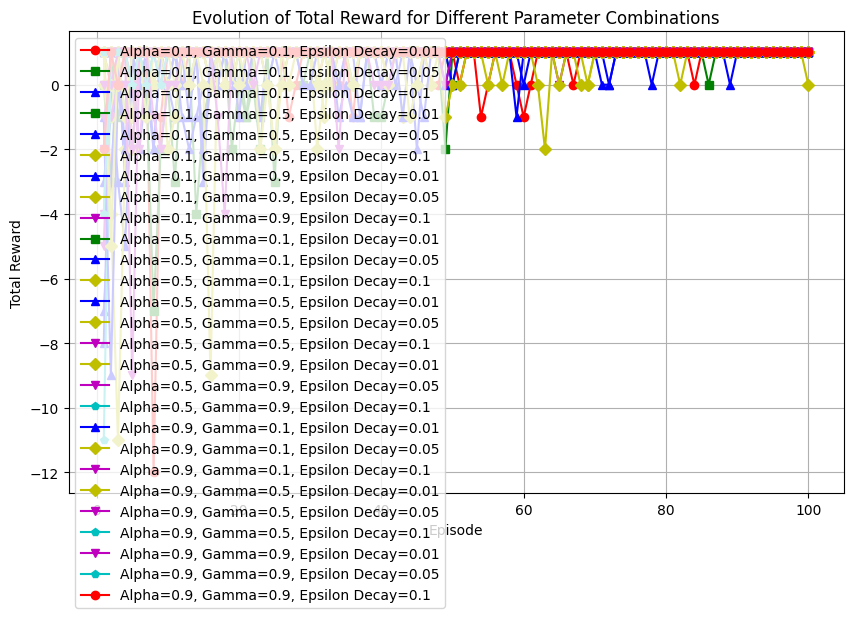

In [6]:
import matplotlib.pyplot as plt

# Defining the Q-learning function
def q_learning(grid_table, start_position, num_iter, alpha, gamma, epsilon, epsilon_decay):
    # Here I initialize Q-table
    rows, cols = len(grid_table), len(grid_table[0])
    flatt_grid = np.array(grid_table).flatten()
    QTable = np.zeros((rows * cols, nb_action))

    # Initializing variables to store total rewards after each episode
    total_rewards = []

    # Q-learning algorithm loop
    for iteration in range(num_iter):
        # I randomly choose a state to start
        current_state = start_position
        total_reward = 0  # Initialize total reward for the current episode

        while current_state != 3:  # Continue until reaching the terminal state
            # Epsilon-greedy strategy to choose an action
            if np.random.rand() < epsilon:  # Explore
                action = np.random.randint(0, nb_action)
            else:  # Exploit
                action = np.argmax(QTable[current_state, :])

            # I simulate the chosen action and observe the new state and reward
            new_row, new_col = divmod(current_state, cols)
            if action == 0:  # Up
                new_row = max(0, new_row - 1) if new_row != 2 or new_col != 1 else new_row          
            elif action == 1:  # Down
                new_row = min(rows - 1, new_row + 1) if new_row != 0 or new_col != 1 else new_row
            elif action == 2:  # Right
                new_col = min(cols - 1, new_col + 1) if new_row != 1 or new_col != 0 else new_col
            elif action == 3:  # Left
                new_col = max(0, new_col - 1) if new_row != 1 or new_col != 2 else new_col

            new_state = new_row * cols + new_col
            immediate_reward = flatt_grid[new_state]

            # Updating the Q-value for the chosen action
            QTable[current_state, action] = (1 - alpha) * QTable[current_state, action] + \
                                            alpha * (immediate_reward + gamma * np.max(QTable[new_state, :]))

            # MovING to a new state
            current_state = new_state

            # Accumulate immediate reward for the current episode
            total_reward += immediate_reward

        # Decrease epsilon for exploration-exploitation trade-off
        epsilon = max(0.1, epsilon - epsilon_decay)

        # Store total reward for the current episode
        total_rewards.append(total_reward)

    return total_rewards

# Define parameters
grid_table = [
    [0, 0, 0, 1],
    [0, 0, 0, -1],
    [0, 0, 0, 0]
]
start_position = 8
num_iter = 100
nb_action = 4
alpha_values = [0.1, 0.5, 0.9]  # Different values of alpha
gamma_values = [0.1, 0.5, 0.9]  # Different values of gamma
epsilon_decay_values = [0.01, 0.05, 0.1]  # Different values of epsilon decay
epsilon = 1.0  # The initial exploration rate

# Here for ploting settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
markers = ['o', 's', '^', 'D', 'v', 'p']
plt.figure(figsize=(10, 6))
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Evolution of Total Reward for Different Parameter Combinations')

# In this step I run the algorithm, Q-learning with different parameter combinations and plot results
for i, alpha in enumerate(alpha_values):
    for j, gamma in enumerate(gamma_values):
        for k, epsilon_decay in enumerate(epsilon_decay_values):
            total_rewards = q_learning(grid_table, start_position, num_iter, alpha, gamma, epsilon, epsilon_decay)
            label = f'Alpha={alpha}, Gamma={gamma}, Epsilon Decay={epsilon_decay}'
            plt.plot(range(1, num_iter + 1), total_rewards, color=colors[(i + j + k) % len(colors)], marker=markers[(i + j + k) % len(markers)], label=label)

plt.legend(loc='upper left')
plt.grid(True)
plt.show()
